In [ ]:
import pandas as pd
pumpkin = pd.read_csv('US_pumpkins.csv')
print(pumpkin.head(5))



In [ ]:
#1. Now, lets Check if there is missing data in the current dataframe:
print(pumpkin.isnull().sum())


In [ ]:
# To make your dataframe easier to work with, lets drop several of its columns, using `drop()`, keeping only the columns you need:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
# now lets drop the colums outside 'new_columns' by looping and using drop()
for column in pumpkin.columns:
    if column not in new_columns:
        pumpkin.drop(column, axis=1, inplace=True)
# now lets check the new dataframe
print(pumpkin.head(15))

In [ ]:
# Now lets determine the average price of pumpkin in a given month
pumpkin['Average Price'] = (pumpkin['Low Price'] + pumpkin['High Price']) / 2
# Now lets check the new dataframe
print(pumpkin.head(15))

month = pd.DatetimeIndex(pumpkin['Date']).month
print(month)


In [ ]:
#lets normalize the pricing 

pumpkin = pumpkin[pumpkin['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkin)

price = pumpkin['Average Price']

# Recalculate month for the filtered pumpkin dataframe
filtered_month = pd.DatetimeIndex(pumpkin['Date']).month

new_pumpkin = pd.DataFrame({'Month': filtered_month, 'Package': pumpkin['Package'], 'Low Price': pumpkin['Low Price'],'High Price': pumpkin['High Price'], 'Price': price})

new_pumpkin.loc[new_pumpkin['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkin.loc[new_pumpkin['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkin)

In [ ]:
# To visualize using scatter plot let import matplotlib library:
import matplotlib.pyplot as plt
price = new_pumpkin.Price
month = new_pumpkin.Month
plt.scatter(price, month)
plt.show()

In [ ]:
# explore the data using bar chart:
new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.show()

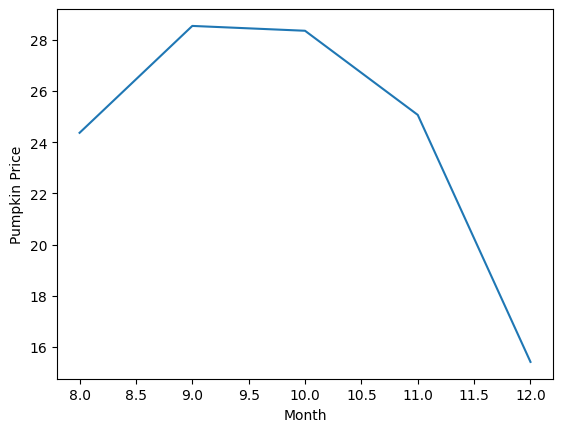

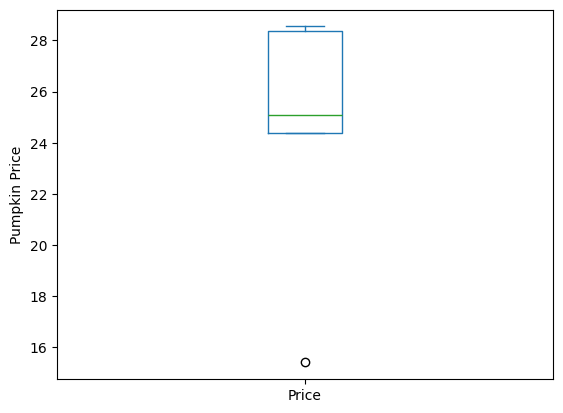

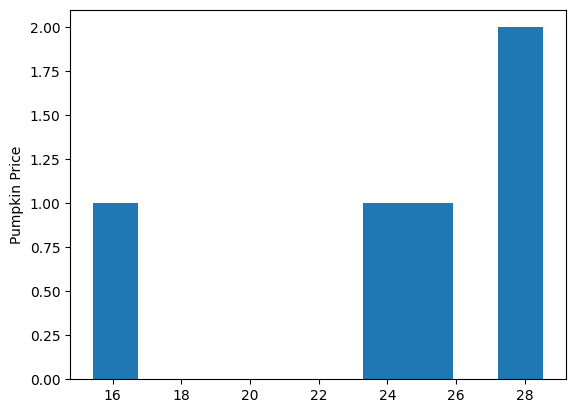

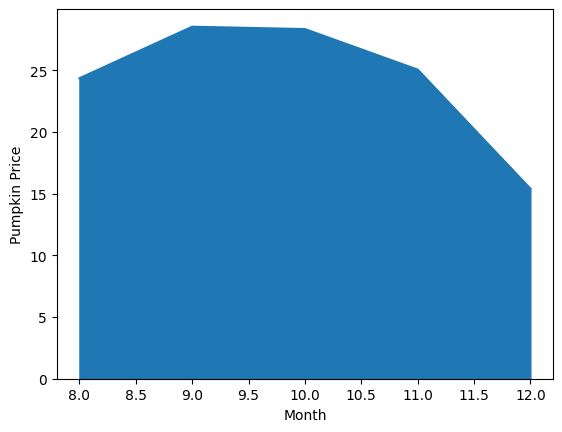

In [ ]:
# lets explore other matplotlib libraries other than scatter plot and bar chart

new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind='line')
plt.ylabel("Pumpkin Price")
plt.show()

new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind='box')
plt.ylabel("Pumpkin Price")
plt.show()

new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind='hist')
plt.ylabel("Pumpkin Price")
plt.show()

new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind='area')
plt.ylabel("Pumpkin Price")
plt.show()







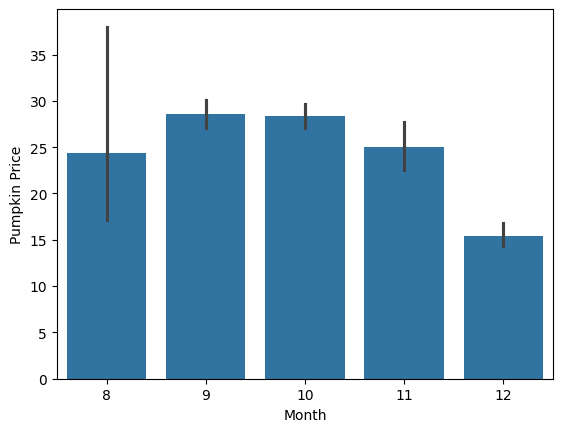

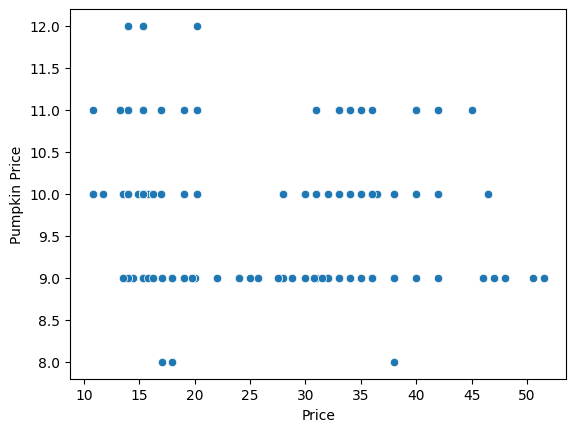

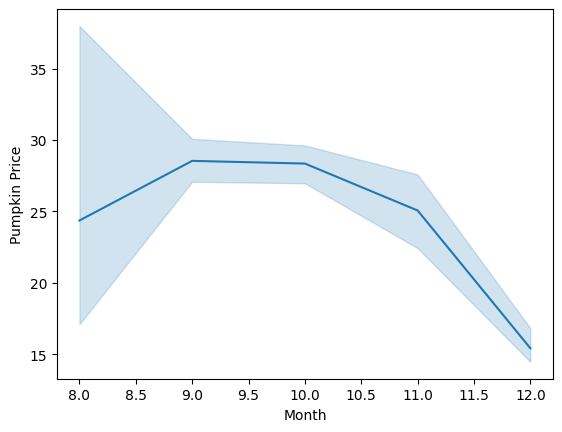

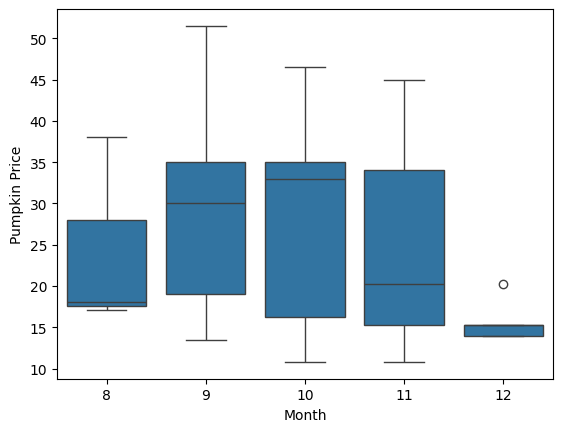

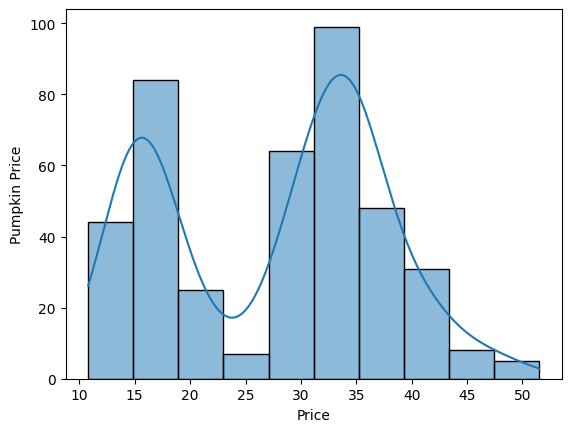

In [44]:
# now lets explore seaborn library
import seaborn as sns
sns.barplot(x='Month', y='Price', data=new_pumpkin)
plt.ylabel("Pumpkin Price")
plt.show()
sns.scatterplot(x='Price', y='Month', data=new_pumpkin)
plt.ylabel("Pumpkin Price")
plt.show()
sns.lineplot(x='Month', y='Price', data=new_pumpkin)
plt.ylabel("Pumpkin Price")
plt.show()
sns.boxplot(x='Month', y='Price', data=new_pumpkin)
plt.ylabel("Pumpkin Price")
plt.show()
sns.histplot(x='Price', data=new_pumpkin, kde=True)
plt.ylabel("Pumpkin Price")
plt.show()


In [56]:
print(new_pumpkin['Month'].corr(new_pumpkin['Price']))


-0.1491291363427862


In [66]:
%pip install scikit-learn


  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 726.4 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.7 MB 726.4 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.7 MB 712.3 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/8.7 MB 754.6 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/8.7 MB 754.6 kB